In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install conda-forge::spot

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.3

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [ ]:
!git clone https://github.com/SYNTCOMP/benchmarks.git

Cloning into 'benchmarks'...
remote: Enumerating objects: 10827, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 10827 (delta 137), reused 131 (delta 130), pack-reused 10684 (from 2)
Receiving objects: 100% (10827/10827), 639.34 MiB | 17.64 MiB/s, done.
Resolving deltas: 100% (7352/7352), done.
Updating files: 100% (6920/6920), done.
Error downloading object: parity/keiren/FLCTLLimitClosuren=8_compact.gm.bz2.ehoa (de454d0): Smudge error: Error downloading parity/keiren/FLCTLLimitClosuren=8_compact.gm.bz2.ehoa (de454d0ab50377eac90a95672b96a619427484176c7783828d3402575d48e41d): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/benchmarks/.git/lfs/logs/20250115T124033.791275049.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: parity/keiren/FLCT

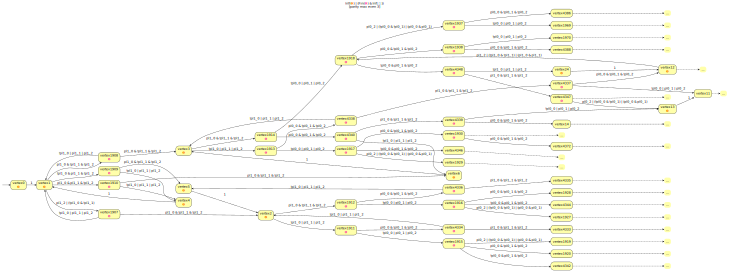

Controllable-AP: controllable-AP: 0 1 2


In [ ]:
from IPython.display import display, SVG
import spot
import subprocess

# Setup Spot environment
spot.setup()

# File path for the extended HOA file
file_path = "/content/benchmarks/parity/keiren/ABP_ABP(BW)_(datasize=2_capacity=1_windowsize=1)eq=branching-bisim.gm.bz2.ehoa"

# Initialize variables
controllable_ap = None

# Parse the eHOA file for controllable-AP
with open(file_path, "r") as file:
    for line in file:
        if "controllable-AP" in line:
            controllable_ap = line.strip()  # Extract controllable-AP information
            break

# Load the automaton using Spot
aut = spot.automaton(file_path)

# Attach custom data for controllable-AP
aut.custom_data = {"controllable-AP": controllable_ap}

# Generate DOT representation and append controllable-AP comment
dot_representation = aut.to_str('dot')
dot_representation += f'\n/* {controllable_ap} */'  # Add a comment to show controllable-AP

# Convert DOT to SVG for visualization
svg_representation = subprocess.run(
    ["dot", "-Tsvg"],
    input=dot_representation,
    text=True,
    capture_output=True
).stdout

# Display the SVG
display(SVG(data=svg_representation))

# Print extracted information
print(f"Controllable-AP: {controllable_ap}")

In [ ]:
def prune_automaton(aut, condition):
    """
    Prune transitions in the automaton based on a BDD condition.
    Only keeps transitions satisfying the condition.
    """
    bdd_dict = aut.get_dict()
    pruned_aut = spot.make_twa_graph(bdd_dict)

    # Set the acceptance condition
    pruned_aut.set_acceptance(aut.num_sets(), aut.get_acceptance().format())

    # Copy states and transitions
    for state in range(aut.num_states()):
        pruned_aut.new_state(aut.state_name(state))

    for edge in aut.edges():
        if edge.cond != bddfalse and edge.cond & condition != bddfalse:
            pruned_aut.new_edge(edge.src, edge.dst, edge.cond, edge.acc)

    # Set the initial state
    pruned_aut.set_init_state(aut.get_init_state())

    return pruned_aut

In [ ]:
import spot

# Define a function to convert the automaton to a parity game
def automaton_to_parity_game(aut):
    """
    Converts a Spot automaton to a parity game.
    Each state in the automaton corresponds to a node in the game.
    Edges are labeled with priorities derived from the acceptance condition.
    """
    parity_game = {
        "states": {},  # Mapping state ID to (owner, priority, edges)
        "initial_state": aut.get_init_state(),
    }

    # Translate automaton states to parity game nodes
    for state in range(aut.num_states()):
        # Owner of the state alternates between players (e.g., based on index or logic)
        owner = 0 if state % 2 == 0 else 1
        priority = aut.get_priority(state) if hasattr(aut, 'get_priority') else 0
        parity_game["states"][state] = {
            "owner": owner,
            "priority": priority,
            "edges": []
        }

    # Add transitions as edges
    for edge in aut.edges():
        source = edge.src
        destination = edge.dst
        parity_game["states"][source]["edges"].append(destination)

    return parity_game

# Create the parity game from the automaton
parity_game = automaton_to_parity_game(aut)

# Display the parity game
print("Parity Game Representation:")
for state, data in parity_game["states"].items():
    print(f"State {state}: Owner={data['owner']}, Priority={data['priority']}, Edges={data['edges']}")

Streaming output truncated to the last 5000 lines.
State 2855: Owner=1, Priority=0, Edges=[5761, 2914]
State 2856: Owner=0, Priority=0, Edges=[5763, 2919]
State 2857: Owner=1, Priority=0, Edges=[5764, 2920]
State 2858: Owner=0, Priority=0, Edges=[5766, 2780]
State 2859: Owner=1, Priority=0, Edges=[2926, 5767, 2925]
State 2860: Owner=0, Priority=0, Edges=[5768, 2781]
State 2861: Owner=1, Priority=0, Edges=[2928]
State 2862: Owner=0, Priority=0, Edges=[2928]
State 2863: Owner=1, Priority=0, Edges=[2929]
State 2864: Owner=0, Priority=0, Edges=[2929]
State 2865: Owner=1, Priority=0, Edges=[5769, 2787]
State 2866: Owner=0, Priority=0, Edges=[5770, 2930]
State 2867: Owner=1, Priority=0, Edges=[5771, 2931]
State 2868: Owner=0, Priority=0, Edges=[5773, 2572]
State 2869: Owner=1, Priority=0, Edges=[5775, 2575]
State 2870: Owner=0, Priority=0, Edges=[802, 755]
State 2871: Owner=1, Priority=0, Edges=[5777, 2932]
State 2872: Owner=0, Priority=0, Edges=[802, 757]
State 2873: Owner=1, Priority=0, Ed

In [ ]:
def attractor(game, player, target):
    """
    Compute the attractor set for a given player and target set in the parity game.
    """
    attractor_set = set(target)
    added = True

    while added:
        added = False
        for state, data in game["states"].items():
            if state not in attractor_set:
                if data["owner"] == player:
                    # Player owns the state and has a move to the attractor set
                    if any(dest in attractor_set for dest in data["edges"]):
                        attractor_set.add(state)
                        added = True
                else:
                    # Opponent owns the state, ensure all moves lead to the attractor
                    if all(dest in attractor_set for dest in data["edges"]):
                        attractor_set.add(state)
                        added = True
    return attractor_set


def zielonka(game):
    if not game["states"]:
        return set(), set()  # No states in the game

    max_priority = max(data["priority"] for data in game["states"].values())
    player = max_priority % 2
    max_priority_states = {
        state for state, data in game["states"].items() if data["priority"] == max_priority
    }
    player_attractor = attractor(game, player, max_priority_states)

    subgame = {
        "states": {
            state: {
                "owner": data["owner"],
                "priority": data["priority"],
                "edges": [e for e in data["edges"] if e not in player_attractor]
            }
            for state, data in game["states"].items()
            if state not in player_attractor
        },
        "initial_state": game["initial_state"]
    }

    opponent_win, player_win = zielonka(subgame)

    # Align with max even condition
    if player == 0:
        player_win.update(player_attractor)
    else:
        opponent_win.update(player_attractor)

    return opponent_win, player_win

# Solve the parity game using Zielonka's algorithm
adam_wins, eve_wins = zielonka(parity_game)

# Output the results
print("Zielonka Algorithm Results:")
print(f"Adam Wins: {sorted(adam_wins)}")
print(f"Eve Wins: {sorted(eve_wins)}")

Zielonka Algorithm Results:
Adam Wins: []
Eve Wins: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 21

In [ ]:
## automation trial

import os
import spot

def preprocess_controllable_aps(file_path):
    """
    Parse the controllable-AP line from the eHOA file to determine controllable atomic propositions.
    """
    controllable_ap_set = set()
    with open(file_path, "r") as file:
        for line in file:
            if "controllable-AP" in line:
                controllable_ap_set = set(map(int, line.strip().split(":")[1].split()))
                break
    return controllable_ap_set

def parse_ehoa_to_game(file_path):
    """
    Parse an eHOA file to create a parity game representation.
    """
    aut = spot.automaton(file_path)

    # Skip large files based on acceptance sets
    if aut.num_sets() > 100:  # Define a threshold (e.g., 100)
        print(f"Skipping {file_path} due to large number of acceptance sets: {aut.num_sets()}")
        return None

    game = {
        "states": {},
        "initial_state": aut.get_init_state()
    }

    for state in range(aut.num_states()):
        owner = 0 if state % 2 == 0 else 1  # Placeholder logic for ownership
        priority = aut.get_priority(state) if hasattr(aut, 'get_priority') else 0
        game["states"][state] = {
            "owner": owner,
            "priority": priority,
            "edges": []
        }

    for edge in aut.edges():
        source = edge.src
        destination = edge.dst
        game["states"][source]["edges"].append(destination)

    return game

def save_winning_states(file_name, adam_wins, eve_wins):
    """
    Save the winning states for Adam and Eve to a file.
    """
    output_file = f"{file_name}_winnings.txt"
    with open(output_file, "w") as f:
        f.write(f"Adam Wins: {sorted(adam_wins)}\n")
        f.write(f"Eve Wins: {sorted(eve_wins)}\n")
    print(f"Results saved to {output_file}")

# Path to the directory containing eHOA files
ehoa_dir = "/content/benchmarks/parity/keiren/"

# Loop through all eHOA files
for root, _, files in os.walk(ehoa_dir):
    for file in files:
        if file.endswith(".ehoa"):
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            try:
                # Preprocess the eHOA file and create the parity game
                controllable_aps = preprocess_controllable_aps(file_path)
                game = parse_ehoa_to_game(file_path)

                # Skip files with large acceptance sets
                if game is None:
                    continue

                # Solve the parity game using Zielonka's algorithm
                adam_wins, eve_wins = zielonka(game)

                # Save the results
                save_winning_states(file, adam_wins, eve_wins)

            except Exception as e:
                print(f"Error processing {file_path}: {e}")

Processing file: /content/benchmarks/parity/keiren/MuCalcLimitClosurephi=p_n=0_compact.gm.bz2.ehoa
Error processing /content/benchmarks/parity/keiren/MuCalcLimitClosurephi=p_n=0_compact.gm.bz2.ehoa: 
/content/benchmarks/parity/keiren/MuCalcLimitClosurephi=p_n=0_compact.gm.bz2.ehoa:5.1-14: this implementation cannot support such a large number of acceptance sets

Processing file: /content/benchmarks/parity/keiren/StarNesterk=2_n=2_compact.gm.bz2.ehoa
Results saved to StarNesterk=2_n=2_compact.gm.bz2.ehoa_winnings.txt
Processing file: /content/benchmarks/parity/keiren/Buffer_SWP_(datasize=2_capacity=1_windowsize=1)eq=branching-bisim.gm.bz2.ehoa
Results saved to Buffer_SWP_(datasize=2_capacity=1_windowsize=1)eq=branching-bisim.gm.bz2.ehoa_winnings.txt
Processing file: /content/benchmarks/parity/keiren/StarNesterk=2_n=1_compact.gm.bz2.ehoa
Results saved to StarNesterk=2_n=1_compact.gm.bz2.ehoa_winnings.txt
Processing file: /content/benchmarks/parity/keiren/Hesselink_(Specification)_Hesseli